In [2]:
cd "~/Snudda"

/home/ubuntu/Snudda


## Simulate the network

Set up striatal network of 100 neurons. This writes the configuration file `network-config.json` (see the last line of the output). Option `--overwrite` allows to overwrite the network's directory if it exists.

In [3]:
!snudda init networks/tinySim --size 100 --overwrite

Creating config file
Network path: networks/tinySim
Creating missing directory networks/tinySim
Created directory networks/tinySim
CreateConfig
Using 1 functional channels
Adding Striatum with 100 neurons
Using cube for striatum
Creating cube mesh
File: networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00010749824478388102
Description: Striatum cube mesh, centre = [0.00354  0.004645 0.005081], side = 0.00010749824478388102
Adding neurons: FSN from dir /home/ubuntu/Snudda/snudda/data/cellspecs-v2/fs
Adding neurons: dSPN from dir /home/ubuntu/Snudda/snudda/data/cellspecs-v2/dspn
Adding neurons: iSPN from dir /home/ubuntu/Snudda/snudda/data/cellspecs-v2/ispn
Adding neurons: ChIN from dir /home/ubuntu/Snudda/snudda/data/cellspecs-v2/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002],[-0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[-0.0001],[3.e-05]) = [1.84256218e-10]
LTS 

Place the neurons based on the network config file. Positions are written to the file `network-neuron-positions.hdf5`.

In [4]:
!snudda place networks/tinySim

Placing neurons
Network path: networks/tinySim
Creating missing directory networks/tinySim/log
Created directory networks/tinySim/log
Using runID = 1
Using hdf5 version: latest
Parsing configuration file networks/tinySim/network-config.json
Using meshBinWidth 0.00010749824478388102
Cube mesh, switching to serial processing.
No mesh cache file found (networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle)
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle
Calculation time: 0.011966318999839132 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 1 FSN_1
No cache file found.
Saving cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-

Detect the apposition points where axons and dendrites of different neurons overlap.  
**NOTE**: this takes about 10 minutes on a common desktop. -- *took 5 minutes here*

In [5]:
!snudda detect networks/tinySim

Touch detection
Network path: networks/tinySim
Creating missing directory networks/tinySim/voxels
Created directory networks/tinySim/voxels
Using runID = 2
Already have a log file setup, ignoring
Using hdf5 driver version: latest
{'total': 65877324, 'free': 65199580, 'used': 677744}
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Loading from networks/tinySim/network-config.json
Reading prototype for: FSN_1
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/fs/str-fs-e180418_FS5-mMTC251001A-IDB-v20190301/MTC251001A-IDB-cor-rep-cache.pickle
Reading prototype for: dSPN_0
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Reading prototype for: dSPN_1
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_2
Found cache file: /home/ubunt

Prune the detected appositions to get the set of synapses.

In [6]:
!snudda prune networks/tinySim

Prune synapses
Network path: networks/tinySim
/home/ubuntu/Snudda/snudda/prune.py:294: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  and self.workHistoryFile is not "last", \
Using runID = 3
preMergeOnly : False
Setting random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/tinySim/log/network-detect-worklog.hdf5
Using default scratch path: networks/tinySim//temp/
Checking for merge file networks/tinySim//network-putative-synapses-MERGED.hdf5
Running merge in serial
Doing bigMerge (lookup) for synapses
[0, 521, 1048576, 0.75]
(0, 521, 20971520, 0.75)
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-26.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-27.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-21.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-6.hdf5


Generate external input events for the network. A 1 second duration of the simulation is reserved.

In [7]:
!snudda input networks/tinySim --input snudda/data/config/input-tinytest-v6.json --time 2.0

Setting up inputs, assuming input.json exists
Using runID = 4
Writing input spikes to networks/tinySim/input-spikes.hdf5
Time = 2.0
Setting random seed: None
Using hdf5 version latest
Loading HDF5-file: networks/tinySim/network-pruned-synapses.hdf5
Loading input configuration from snudda/data/config/input-tinytest-v6.json
Reading neuron postions
Loading networks/tinySim/network-neuron-positions.hdf5
No SlurmID set, using -1
Load done. 0.011563428999579628
Reading config file networks/tinySim/network-config.json
IPYTHON_PROFILE = None
No IPYTHON_PROFILE enviroment variable set, running in serial
Running makeChannelSpikeTrains
Running makeNeuronInputParallell
Clearing channelSpikesList, thus all neurons will have their own mother process for each input
Running input generation in serial
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Generating 189 inputs for dSPN_1
Gathering 0 - Corti

### Compile MOD files
*not necessary - requirementes are already met by following the instructions.txt*

In [8]:
#!nrnivmodl snudda/data/cellspecs-v2/mechanisms

/home/ubuntu/Snudda
Mod files: "snudda/data/cellspecs-v2/mechanisms/Kv3_ch.mod" "snudda/data/cellspecs-v2/mechanisms/NO.mod" "snudda/data/cellspecs-v2/mechanisms/bk_ch.mod" "snudda/data/cellspecs-v2/mechanisms/bk_fs.mod" "snudda/data/cellspecs-v2/mechanisms/bk_ms.mod" "snudda/data/cellspecs-v2/mechanisms/ca_ch.mod" "snudda/data/cellspecs-v2/mechanisms/cadyn_fs.mod" "snudda/data/cellspecs-v2/mechanisms/cadyn_ms.mod" "snudda/data/cellspecs-v2/mechanisms/cal12_ms.mod" "snudda/data/cellspecs-v2/mechanisms/cal13_ms.mod" "snudda/data/cellspecs-v2/mechanisms/cal_ch.mod" "snudda/data/cellspecs-v2/mechanisms/caldyn_ms.mod" "snudda/data/cellspecs-v2/mechanisms/can_fs.mod" "snudda/data/cellspecs-v2/mechanisms/can_ms.mod" "snudda/data/cellspecs-v2/mechanisms/cap_ch.mod" "snudda/data/cellspecs-v2/mechanisms/caq_fs.mod" "snudda/data/cellspecs-v2/mechanisms/caq_ms.mod" "snudda/data/cellspecs-v2/mechanisms/car_fs.mod" "snudda/data/cellspecs-v2/mechanisms/car_ms.mod" "snudda/data/cellspecs-v2/mechanism

### Run the simulation

Option `--time` defines duration of the simulation, in seconds. It can't be longer than the duration of the external input reserved above. Try 100 milliseconds for a very short simulation. -> *if we are increasing simulation time, increase input time as well*

**NOTE**: this takes about 15 minutes on a common desktop. -- *took 11 minutes*

In [9]:
!snudda simulate networks/tinySim --time 2.0 --input networks/tinySim/input-spikes.hdf5 --voltOut networks/tinySim/simulation/volt.txt

numprocs=1
Creating missing directory networks/tinySim/simulation
Created directory networks/tinySim/simulation
Using input file networks/tinySim/input-spikes.hdf5
args: Namespace(action='simulate', cont=False, disableConnection=None, disableGJ=False, h5legacy=False, hvsize=None, input='networks/tinySim/input-spikes.hdf5', inputFile=None, mechDir=None, mergeonly=False, nchannels=1, networkFile=None, overwrite=False, path='networks/tinySim', profile=False, recordGapJunctions=None, recordPointProcess=None, size=None, spikesOut=None, time=2.0, verbose=False, voltOut='networks/tinySim/simulation/volt.txt', volumeID=None)
Using networkFile: networks/tinySim/network-pruned-synapses.hdf5
Using inputFile: networks/tinySim/input-spikes.hdf5
Using logFile: networks/tinySim/log/network-simulation-log.txt
Creating save/traces
I am node 0
Worker 0: Loading network from networks/tinySim/network-pruned-synapses.hdf5
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
9

## Plot simulation results

In [10]:
from ipywidgets import *
import matplotlib.pyplot as plt

See the spike raster plot for all cell types.

Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7034 synapses and 10000 gap junctions
Load done. 0.07129106299908017
Sort the traces
Sort the traces


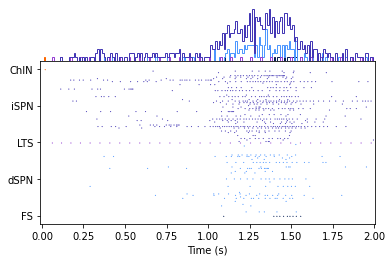

<Figure size 432x288 with 0 Axes>

Saving networks/tinySim/figs/network-output-spikes-666-colour.png


<Figure size 432x288 with 0 Axes>

In [11]:
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/tinySim/simulation/network-output-spikes-666.txt"
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
endTime = 0.1
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

Check voltage traces for randomly the selected cells.

Unable to guess ID, using 666.
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7034 synapses and 10000 gap junctions
Load done. 0.0465848179992463
!!! Excluding first 0s from the plot
Plotting traces: [0, 2, 3, 6, 9]
Plotted 5 traces (total 99)


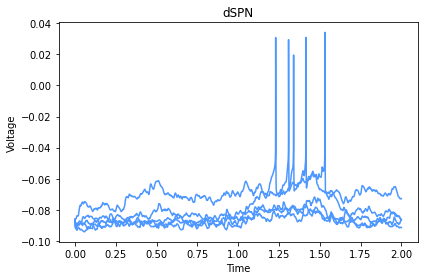

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-dSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [1, 4, 5, 7, 8]
Plotted 5 traces (total 99)


<Figure size 432x288 with 0 Axes>

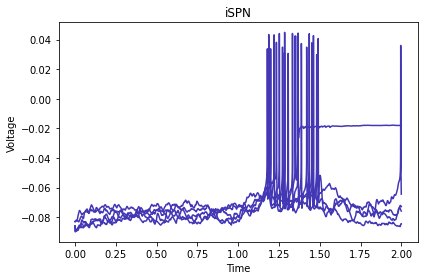

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-iSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [56]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

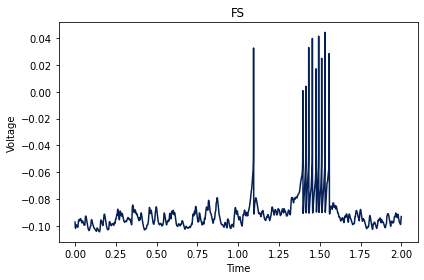

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-FSN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [87]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

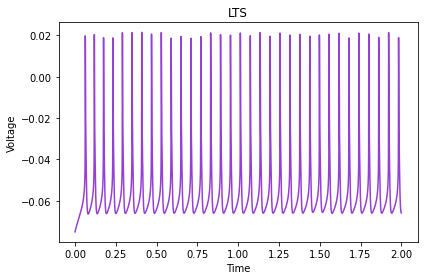

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-LTS-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [79]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

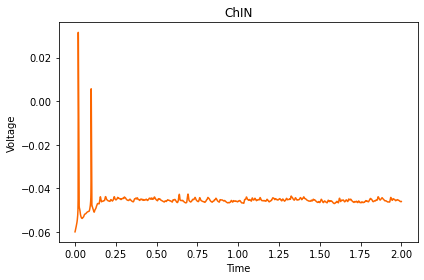

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-ChIN-colour.png


<Figure size 432x288 with 0 Axes>

In [12]:
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

plotOffset = 0
skipTime = 0
nTracesMax = 5

fileName = "networks/tinySim/simulation/volt.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
#%matplotlib widget    
npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)

Analyze spatial distribution of the synapses for each cell type.

Loading networks/tinySim/network-pruned-synapses.hdf5
Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7034 synapses and 10000 gap junctions
Load done. 0.03516301499985275
Number of neurons: 99
Synapse row 0 - 0.0 % time: 0.002542203998018522 seconds
Created connection matrix 0.015901789996860316 seconds
GJ row : 0 - 0.0 %  time : 0.0013530229989555664 seconds
Created gap junction connection matrix 0.053781176000484265 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
nSynapses = 7034, at 0
Created distance histogram (optimised) in 0.017752279996784637 seconds
Saving cache to networks/tinySim/network-pruned-synapses.hdf5-cache
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2070.]
Rejected (too large z-depth): 234
P(d<5e-05)=0.06946983546617916
P(d<0.0001)=0.06069505628976995


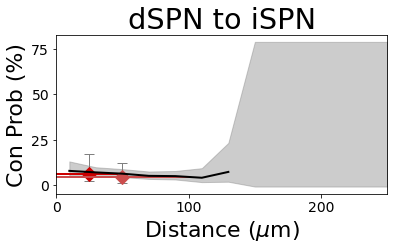

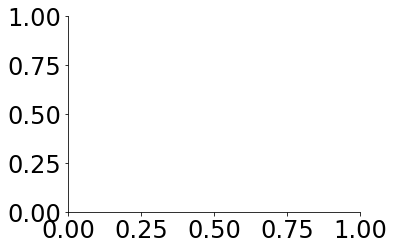

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2050.]
Rejected (too large z-depth): 206
P(d<5e-05)=0.31086519114688127
P(d<0.0001)=0.26162215628091


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


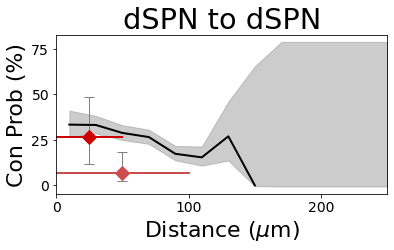

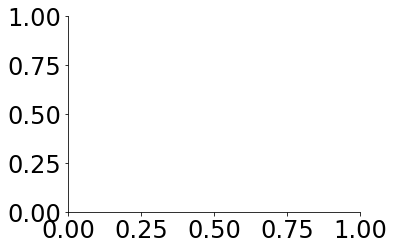

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2070.]
Rejected (too large z-depth): 234
P(d<5e-05)=0.2687385740402194
P(d<0.0001)=0.22173274596182085


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


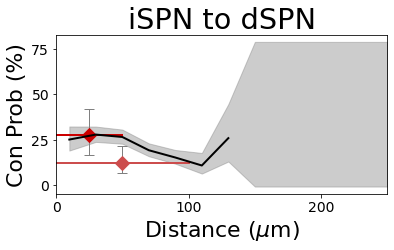

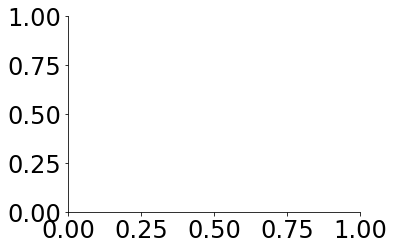

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [1994.]
Rejected (too large z-depth): 262
P(d<5e-05)=0.34342560553633217
P(d<0.0001)=0.31995987963891676


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


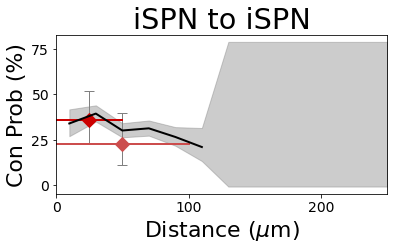

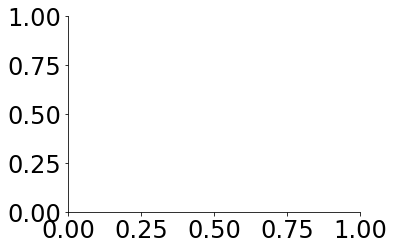

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [47.]
Rejected (too large z-depth): 1
P(d<0.0001)=0.8085106382978723
P(d<0.00015)=0.8085106382978723
P(d<0.00025)=0.8085106382978723


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


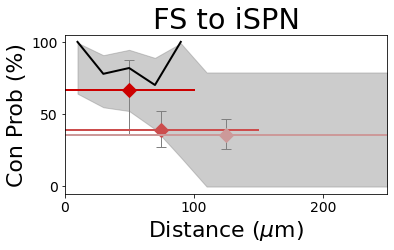

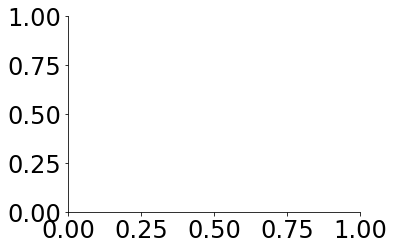

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [47.]
Rejected (too large z-depth): 1
P(d<0.0001)=0.9148936170212766
P(d<0.00015)=0.9148936170212766
P(d<0.00025)=0.9148936170212766


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


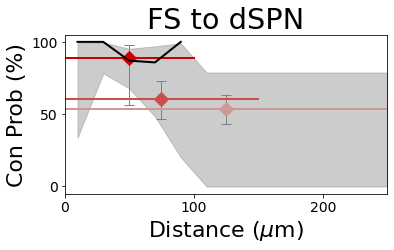

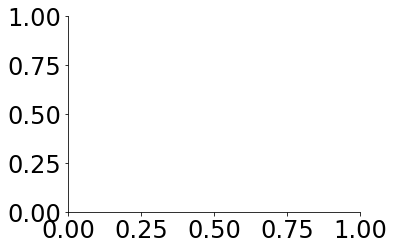

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


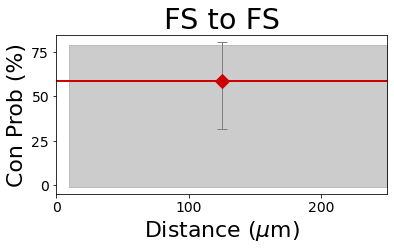

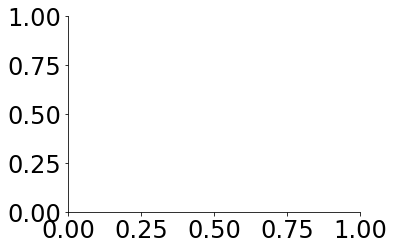

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (gapjunctions)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0
P(d<0.00025)=0.0


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


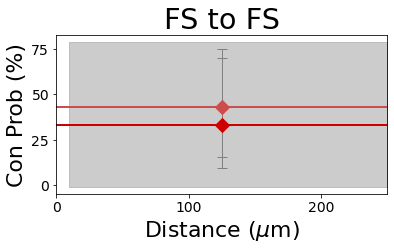

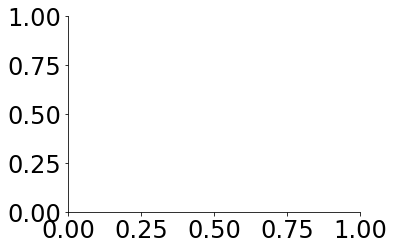

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
Plotting connection probability LTS to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.14583333333333334


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


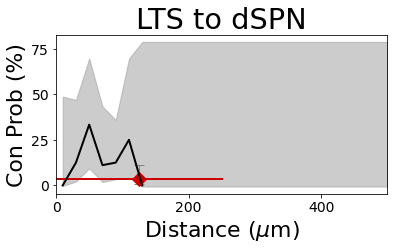

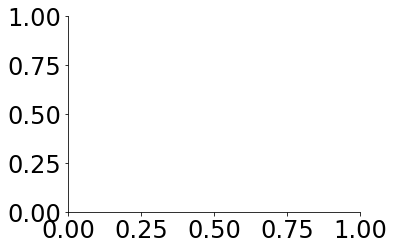

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.08333333333333333


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


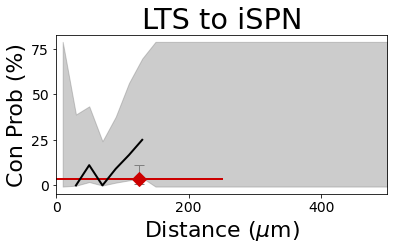

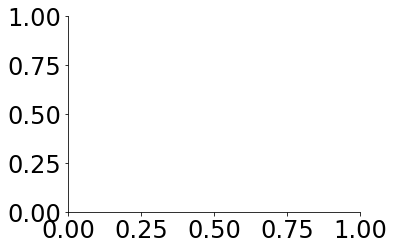

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0
P(d<0.00025)=1.0


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


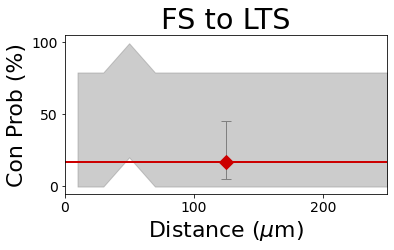

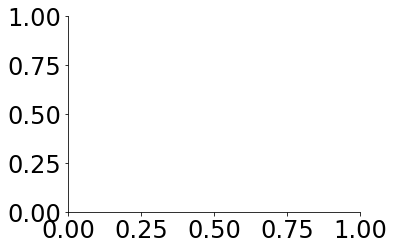

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


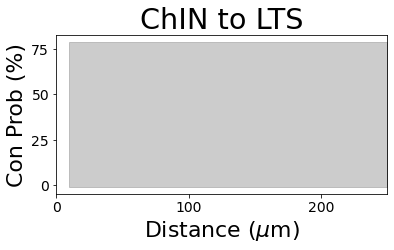

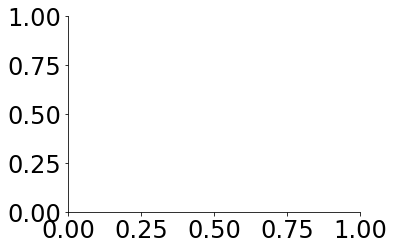

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [38.]
Rejected (too large z-depth): 10
P(d<0.00025)=0.0


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


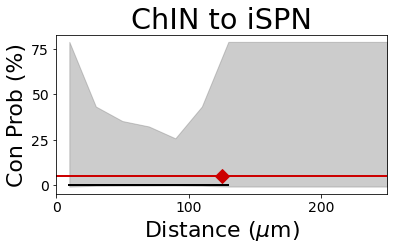

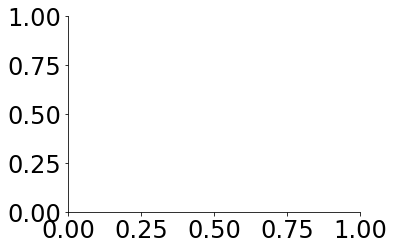

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability ChIN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [36.]
Rejected (too large z-depth): 12
P(d<0.00025)=0.0


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


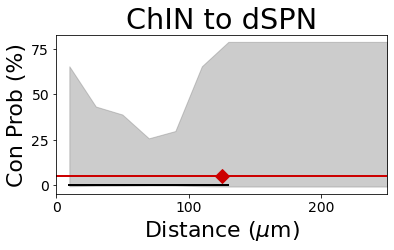

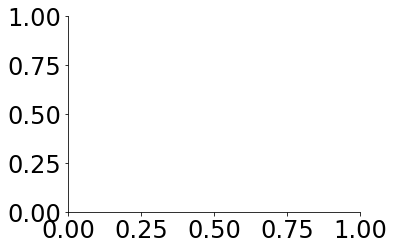

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


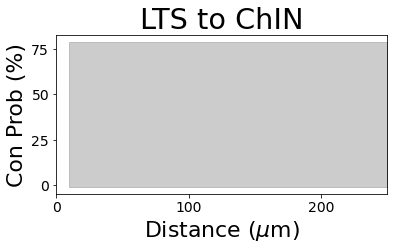

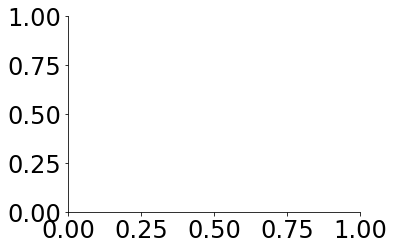

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability ChIN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


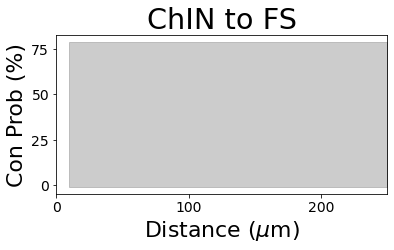

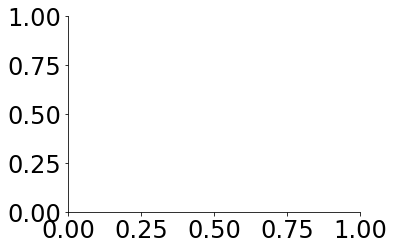

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability dSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [36.]
Rejected (too large z-depth): 12


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


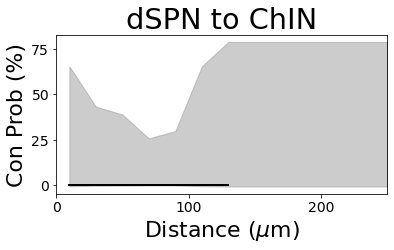

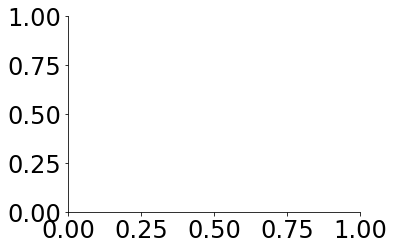

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability iSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [38.]
Rejected (too large z-depth): 10


/home/ubuntu/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


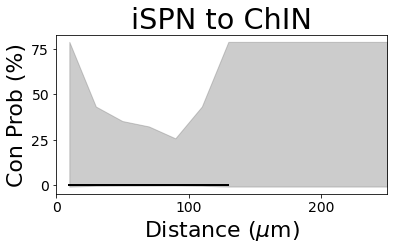

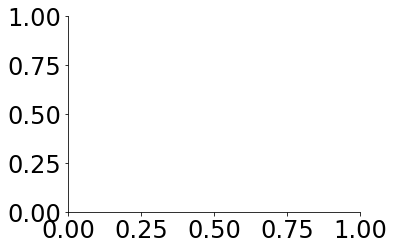

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-ChIN-synapses-2D-dist.pdf


In [13]:
  from snudda.analyse_striatum import SnuddaAnalyseStriatum
  nas = SnuddaAnalyseStriatum("networks/tinySim",volumeType="cube")
    
  plotHenrike = True
  plotChIN = True
  plotLTS = True

  dist3D = False
  #dist3D = True


  if(plotHenrike):

    yMaxH = None #0.5

    nas.plotConnectionProbability("dSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[3/47.0,3/66.0],
                                  expDataDetailed=[(3,47),(3,66)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("dSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[5/19.0,3/43.0],
                                  expDataDetailed=[(5,19),(3,43)],
                                  yMax=yMaxH)    
    nas.plotConnectionProbability("iSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[13/47.0,10/80.0],
                                  expDataDetailed=[(13,47),(10,80)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("iSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[14/39.0,7/31.0],
                                  expDataDetailed=[(14,39),(7,31)],
                                  yMax=yMaxH)


  if(True):

    nas.plotConnectionProbability("FSN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[6/9.0, 21/54.0, 27/77.0],
                                  expDataDetailed=[(6,9),(21,54),(27,77)],
                                  yMax=None)

    nas.plotConnectionProbability("FSN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[8/9.0, 29/48.0, 48/90.0],
                                  expDataDetailed=[(8,9),(29,48),(48,90)],
                                  yMax=None)

    
    #  Gittis,...,Kreitzer 2010 (p2228) -- 7/12 (and 3/4 reciprocal) -- distance?
    # FS->FS synapses weaker, 1.1 +/- 1.5nS  
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[250e-6],\
                                  expData=[7/12.0],
                                  expDataDetailed=[(7,12)] )
    
    # Koos & Tepper 1999, 2/6
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D ,
                                  connectionType="gapjunctions",
                                  expMaxDist=[250e-6,250e-6],
                                  expData=[2/6.0,3/7.0],
                                  expDataDetailed=[(2,6),(3,7)],)



  if(plotLTS):

    # 3/21 LTS->MS, Basal Ganglia book --- distance??
    # Ibanez-Sandoval, ..., Tepper  2011 3/21 -- if patching around visual axon
    # but 2/60 when patching blind
    nas.plotConnectionProbability("LTS","dSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

    nas.plotConnectionProbability("LTS","iSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

  
    # Silberberg et al 2013, 2/12 FS-> LTS connected --- distance??
    nas.plotConnectionProbability("FSN","LTS", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2.0/12],
                                  expDataDetailed=[(2,12)])

  nas.plotConnectionProbability("ChIN","LTS", \
                                dist3D=dist3D)
  
  # Janicova 2015?? --- distance??!
  nas.plotConnectionProbability("ChIN","iSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
    
  nas.plotConnectionProbability("ChIN","dSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
  
  if(True):
    nas.plotConnectionProbability("LTS","ChIN", \
                                  dist3D=dist3D )

  if(plotChIN):    
    nas.plotConnectionProbability("ChIN","FSN", \
                                  dist3D=dist3D,
                                  yMax=None)

    nas.plotConnectionProbability("dSPN","ChIN", \
                                  dist3D=dist3D)
    nas.plotConnectionProbability("iSPN","ChIN", \
                                  dist3D=dist3D)



Simulation analysis plots are saved as PDF files in the directory `networks/tinySim/figures`.

In [ ]:
!ls networks/tinySim/figures/*.pdf

## Closing remarks

This example creates a very small striatal network. Size of the network and other parameters can be adjusted. For more information, please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide.

Questions and suggestions related to *Snudda* simulations, please address to the main developer, *Johannes Hjorth* [hjorth@kth.se](mailto:hjorth@kth.se).